### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_theme(context='notebook', style='whitegrid')

### Đọc dữ liệu các bài posts, comments, reactors, sharers

In [3]:
post_df = pd.read_csv('data/vebay69/clean/posts_full.csv')
comment_df = pd.read_csv('data/vebay69/clean/comments_full.csv')
reactor_df = pd.read_csv('data/vebay69/clean/reactors_full.csv')
sharer_df = pd.read_csv('data/vebay69/clean/sharers_full.csv')

### Tổng quan về dữ liệu 

In [5]:
print('Posts: ', post_df.shape)
print('Comments: ', comment_df.shape)
print('Reactors: ', reactor_df.shape)
print('Shares: ', sharer_df.shape)

Posts:  (914, 36)
Comments:  (20986, 10)
Reactors:  (10807, 5)
Shares:  (18942, 4)


In [6]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        914 non-null    int64  
 1   post_text                      914 non-null    object 
 2   shared_text                    24 non-null     object 
 3   time                           914 non-null    object 
 4   image                          884 non-null    object 
 5   image_lowquality               914 non-null    object 
 6   images                         913 non-null    object 
 7   images_description             913 non-null    object 
 8   images_lowquality              914 non-null    object 
 9   images_lowquality_description  914 non-null    object 
 10  likes                          914 non-null    int64  
 11  comments                       914 non-null    int64  
 12  shares                         914 non-null    int

### Dữ liệu các bài post được lấy trong khoảng thời gian nào ?

In [6]:
df['time'].min(), df['time'].max()

('2022-05-06 07:37:28', '2023-11-22 03:43:11')

### Đâu là bài viết có lượt tương tác lớn nhất trong bộ dữ liệu ?

Top 5 post có nhiều lượt reaction nhất

In [7]:
top_5_max_reaction = df.nlargest(5, 'reaction_count')
top_5_max_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
711,5663428510443960,Ai chắc cũng đã từng\n,37754,2022-09-26 04:48:56
622,5854513741335435,Na Ế trải lòng\n,26723,2022-12-01 10:09:47
644,5808693772584099,Tin chuẩn chưa bro\n,26325,2022-11-15 03:55:23
662,5775707419216068,Nổ stk đê\n,24967,2022-11-03 10:30:35
423,6291401437646661,Nhưng mấy anh cứ giựt giựt ấy\n,24928,2023-04-21 03:34:58


In [8]:
top_5_min_reaction = df.nsmallest(5, 'reaction_count')
top_5_min_reaction[['post_id', 'post_text', 'reaction_count', 'time']]

,post_id,post_text,reaction_count,time
466,6238158042971001,Hy vọng mèo 2023 là mèo thần tài 😁,4,2023-04-03 06:00:02
465,6238625046257634,Này để chọc mấy người 1m8 à? 😁,7,2023-04-03 10:30:03
517,6150474095072730,Superhero này siuuuu :v,8,2023-03-05 10:30:03
470,6233068110146661,Ôi tuổi thơ 😂,10,2023-04-01 10:30:01
471,6232543603532445,Sao lại mang toàn thú cưng ra minh họa thế này? 😆,12,2023-04-01 06:00:01


In [9]:
df.rename(columns={'reaction_count': 'total_react'}, inplace=True)

In [10]:
df[['total_react', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].describe().astype(int)

,total_react,comments,shares,like,love,haha,wow,care,sad,angry
count,914,914,914,914,914,914,914,914,914,914
mean,5036,279,72,3425,19,1505,6,5,60,0
std,4477,591,961,2854,150,1972,45,16,229,3
min,4,0,0,0,0,0,0,0,0,0
25%,1968,45,7,1303,2,322,1,1,4,0
50%,3665,99,16,2614,5,762,3,3,14,0
75%,6650,258,40,4601,10,1760,6,5,45,0
max,37754,7500,29000,21311,4205,14508,1354,333,5041,86


In [11]:
df_sorted = df.sort_values('time')
df_sorted.head()

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,comments_full,reactors,w3_fb_url,total_react,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
909,5262746583845490,Ông con Enh Guốc :)\n,NaN,2022-05-06 07:37:28,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1735,49,12,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/5262746...,2921,NaN,5.262745e+15,['5262745410512274'],2023-11-21 08:29:09.776214,1735,5,1146,1,1,33,0
908,5263709253749223,Aizz chán ba ghê ớ..\n,NaN,2022-05-06 15:11:37,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1028,16,2,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/5263709...,1527,NaN,5.263708e+15,['5263708363749312'],2023-11-21 08:29:00.486643,1028,2,490,1,0,6,0
907,5266711463449002,Nhìn bạn cũng C.h.i.ế.n đấy :)\n,NaN,2022-05-07 15:36:30,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",1142,75,22,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/5266711...,2372,NaN,5.266711e+15,['5266710616782420'],2023-11-21 08:28:49.211488,1142,4,1210,1,0,15,0
906,5269137123206436,Happy mother's day <3\n,NaN,2022-05-08 11:52:42,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],758,23,9,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/5269137...,1391,NaN,5.269136e+15,['5269135959873219'],2023-11-21 08:28:37.570599,758,13,612,0,2,6,0
905,5271002853019863,Chính tôi :)\n,NaN,2022-05-09 04:02:31,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],869,81,30,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,NaN,[],https://www.facebook.com/vebay69/posts/5271002...,1539,NaN,5.271003e+15,['5271002636353218'],2023-11-21 08:28:30.041904,869,3,646,0,0,20,1


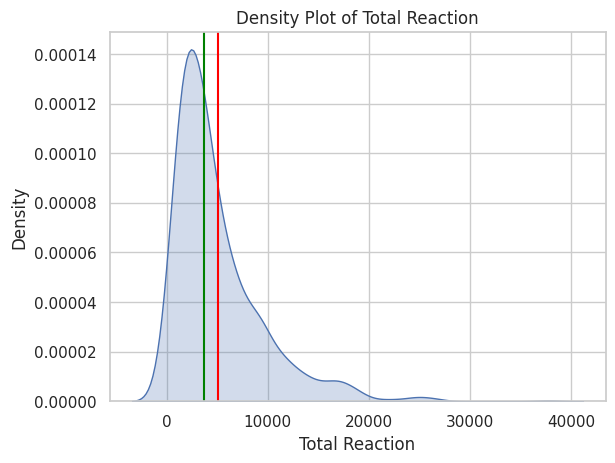

In [12]:
sns.kdeplot(data=df['total_react'], fill=True)
plt.axvline(df['total_react'].mean(), color='red')
plt.axvline(df['total_react'].median(), color='green')
plt.xlabel('Total Reaction')
plt.ylabel('Density')
plt.title('Density Plot of Total Reaction');

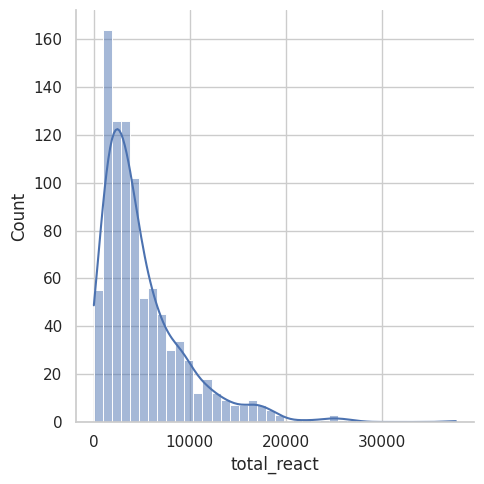

In [13]:
sns.displot(data=df, x='total_react', kde=True);

## Thống kê bài đăng theo ngày trong tuần

In [14]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['time'] = pd.to_datetime(df['time'])
df['weekday'] = df['time'].dt.weekday
posts_per_day_of_week = df['weekday'].value_counts().sort_index().rename(index=weekdays)
posts_per_day_of_week

weekday
Monday       154
Tuesday      135
Wednesday    151
Thursday     153
Friday       140
Saturday      96
Sunday        85
Name: count, dtype: int64

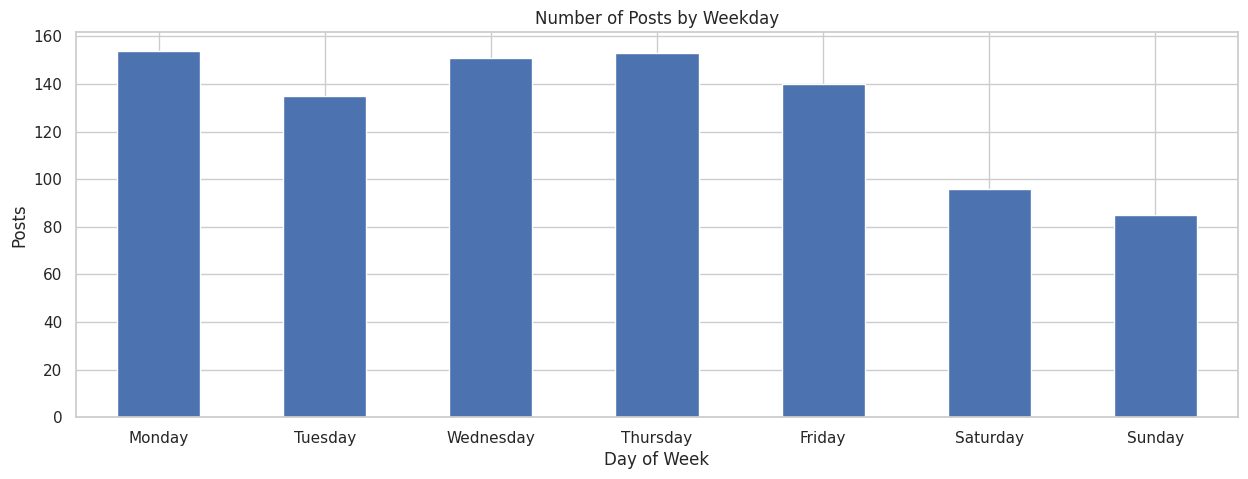

In [15]:
posts_per_day_of_week.plot(kind='bar', figsize=(15, 5), title='Number of Posts by Weekday')
plt.xlabel('Day of Week')
plt.xticks(rotation=0)
plt.ylabel('Posts');

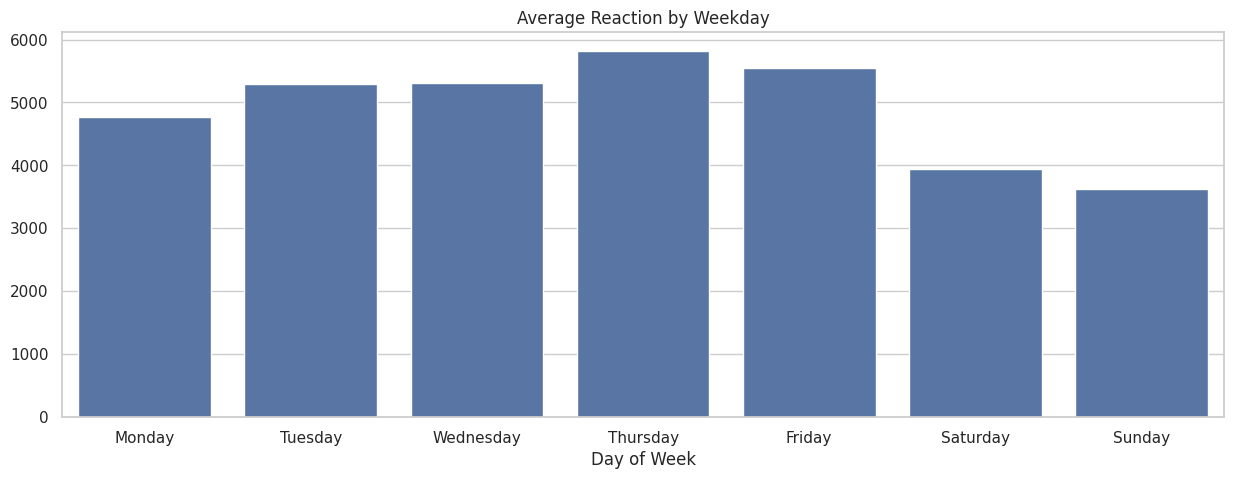

In [16]:
avg_reaction_per_day_of_week = df.groupby('weekday')['total_react'].mean().sort_index()
avg_reaction_per_day_of_week.rename(index=weekdays, inplace=True)
plt.figure(figsize=(15, 5))
sns.barplot(x=avg_reaction_per_day_of_week.index, y=avg_reaction_per_day_of_week.values)
plt.title('Average Reaction by Weekday')
plt.xlabel('Day of Week')
plt.show()

## Thống kê khung giờ đăng bài
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài

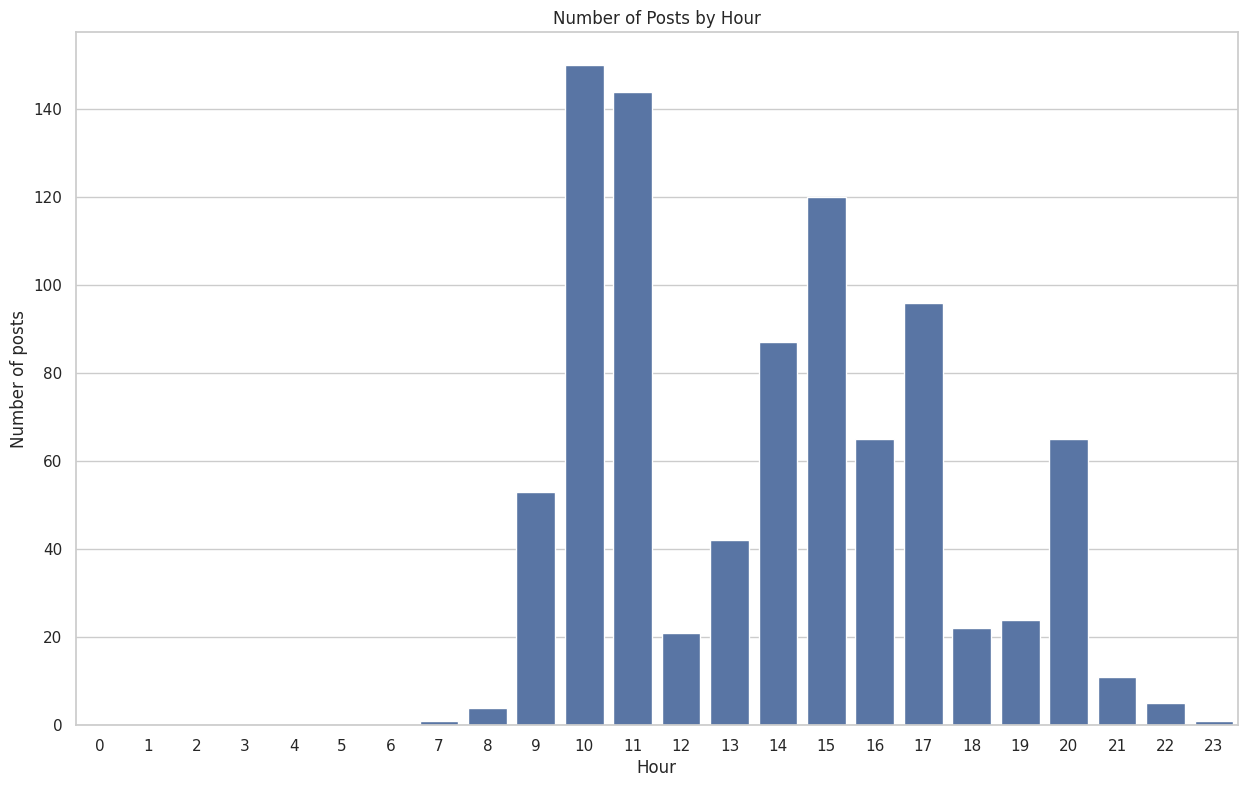

In [17]:
# Convert to hour
df['hour'] = df['time'].dt.hour + 7
# Count number of posts per hour
posts_per_hour = df['hour'].value_counts().sort_index()
# Fill missing hours with 0
all_hours = pd.Index(range(24))
posts_per_hour = posts_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(15, 9))
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values)
plt.title('Number of Posts by Hour')
plt.ylabel('Number of posts')
plt.xlabel('Hour');

### Sự thay đổi của số lượt tương tác theo thời gian

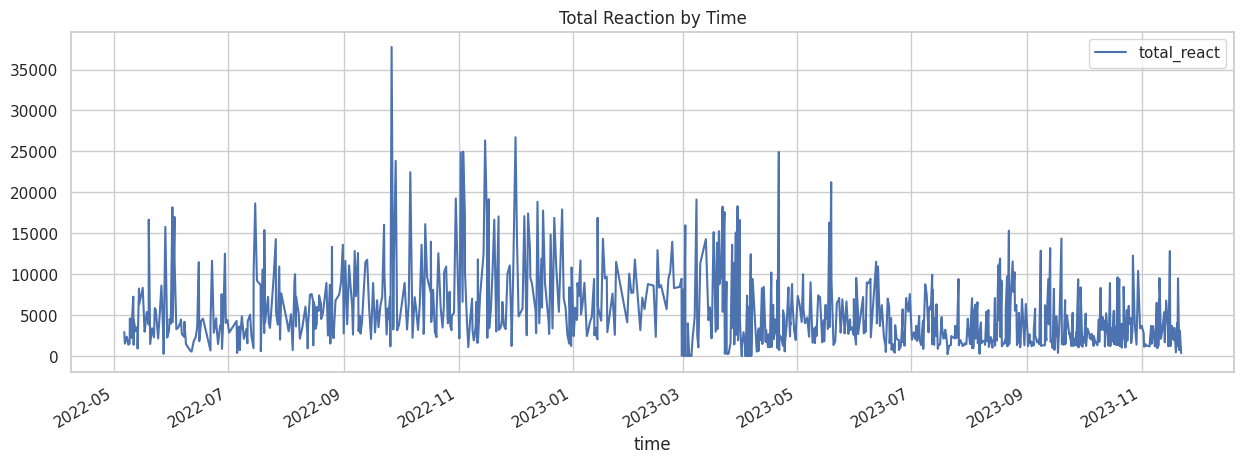

In [18]:
df.plot(x='time', y='total_react', figsize=(15, 5), title='Total Reaction by Time');

### Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?

Mùa đông chưa vậy Con chịu rồi , cái này con không học được Bạn tồiiiiiiiiii Trí_khôn của ta đây 😀_Team vô_sản ✌ ️_Chắc là tóc của người cơ_địa_xoăn thôi ... Giải_trí thôi còn bơi vào bờ được nhé bạn ơi Bạn_bè nhà người_ta chia ngọt_sẻ bùi , ở đây hở tí là ăn mảnh :) Quên hoài … Tôi mỗi buổi sáng_Đàn_ông chúng_tôi mua khăn chỉ cần cấu_hình khủng , hiệu_năng mạnh , màn_hình mượt , tặng kèm ROG Strix_G16 Thật_may vì vẫn còn bạn_bè ở bên Thành_công … Ước có giao_dịch này Báo quá bạn tôi OK , tao nhận thua ... Tổ_tiên không gánh nổi Cho_mày biết thế_nào là óc cờ hó luôn Danh_dự là cái gì so với miếng ăn_=)) Bạn cỡ nào ? Xem giải_trí mà mẹ chốt đơn vậy đó Săn_sale là cách tiết_kiệm tốt nhất 😃 " Ừ 🥹_Đang có dịch sốt_xuất_huyết đấy Buôn đi chỗ khác Buồn_ngủ thật_sự Mày nhiều cái tao chưa thèm nói đâu Na_lại báo rồi Quen không Quá nhiều sự lựa_chọn , chính là đao_khổ Đỏ_đen nghẹo ngập đủ cả Bạn_bè gì tầm này nữa Cho đi để nhận lại Để mai_tính Không có tiền rồi sao mua ?_Sang thật … Làm_gì có t

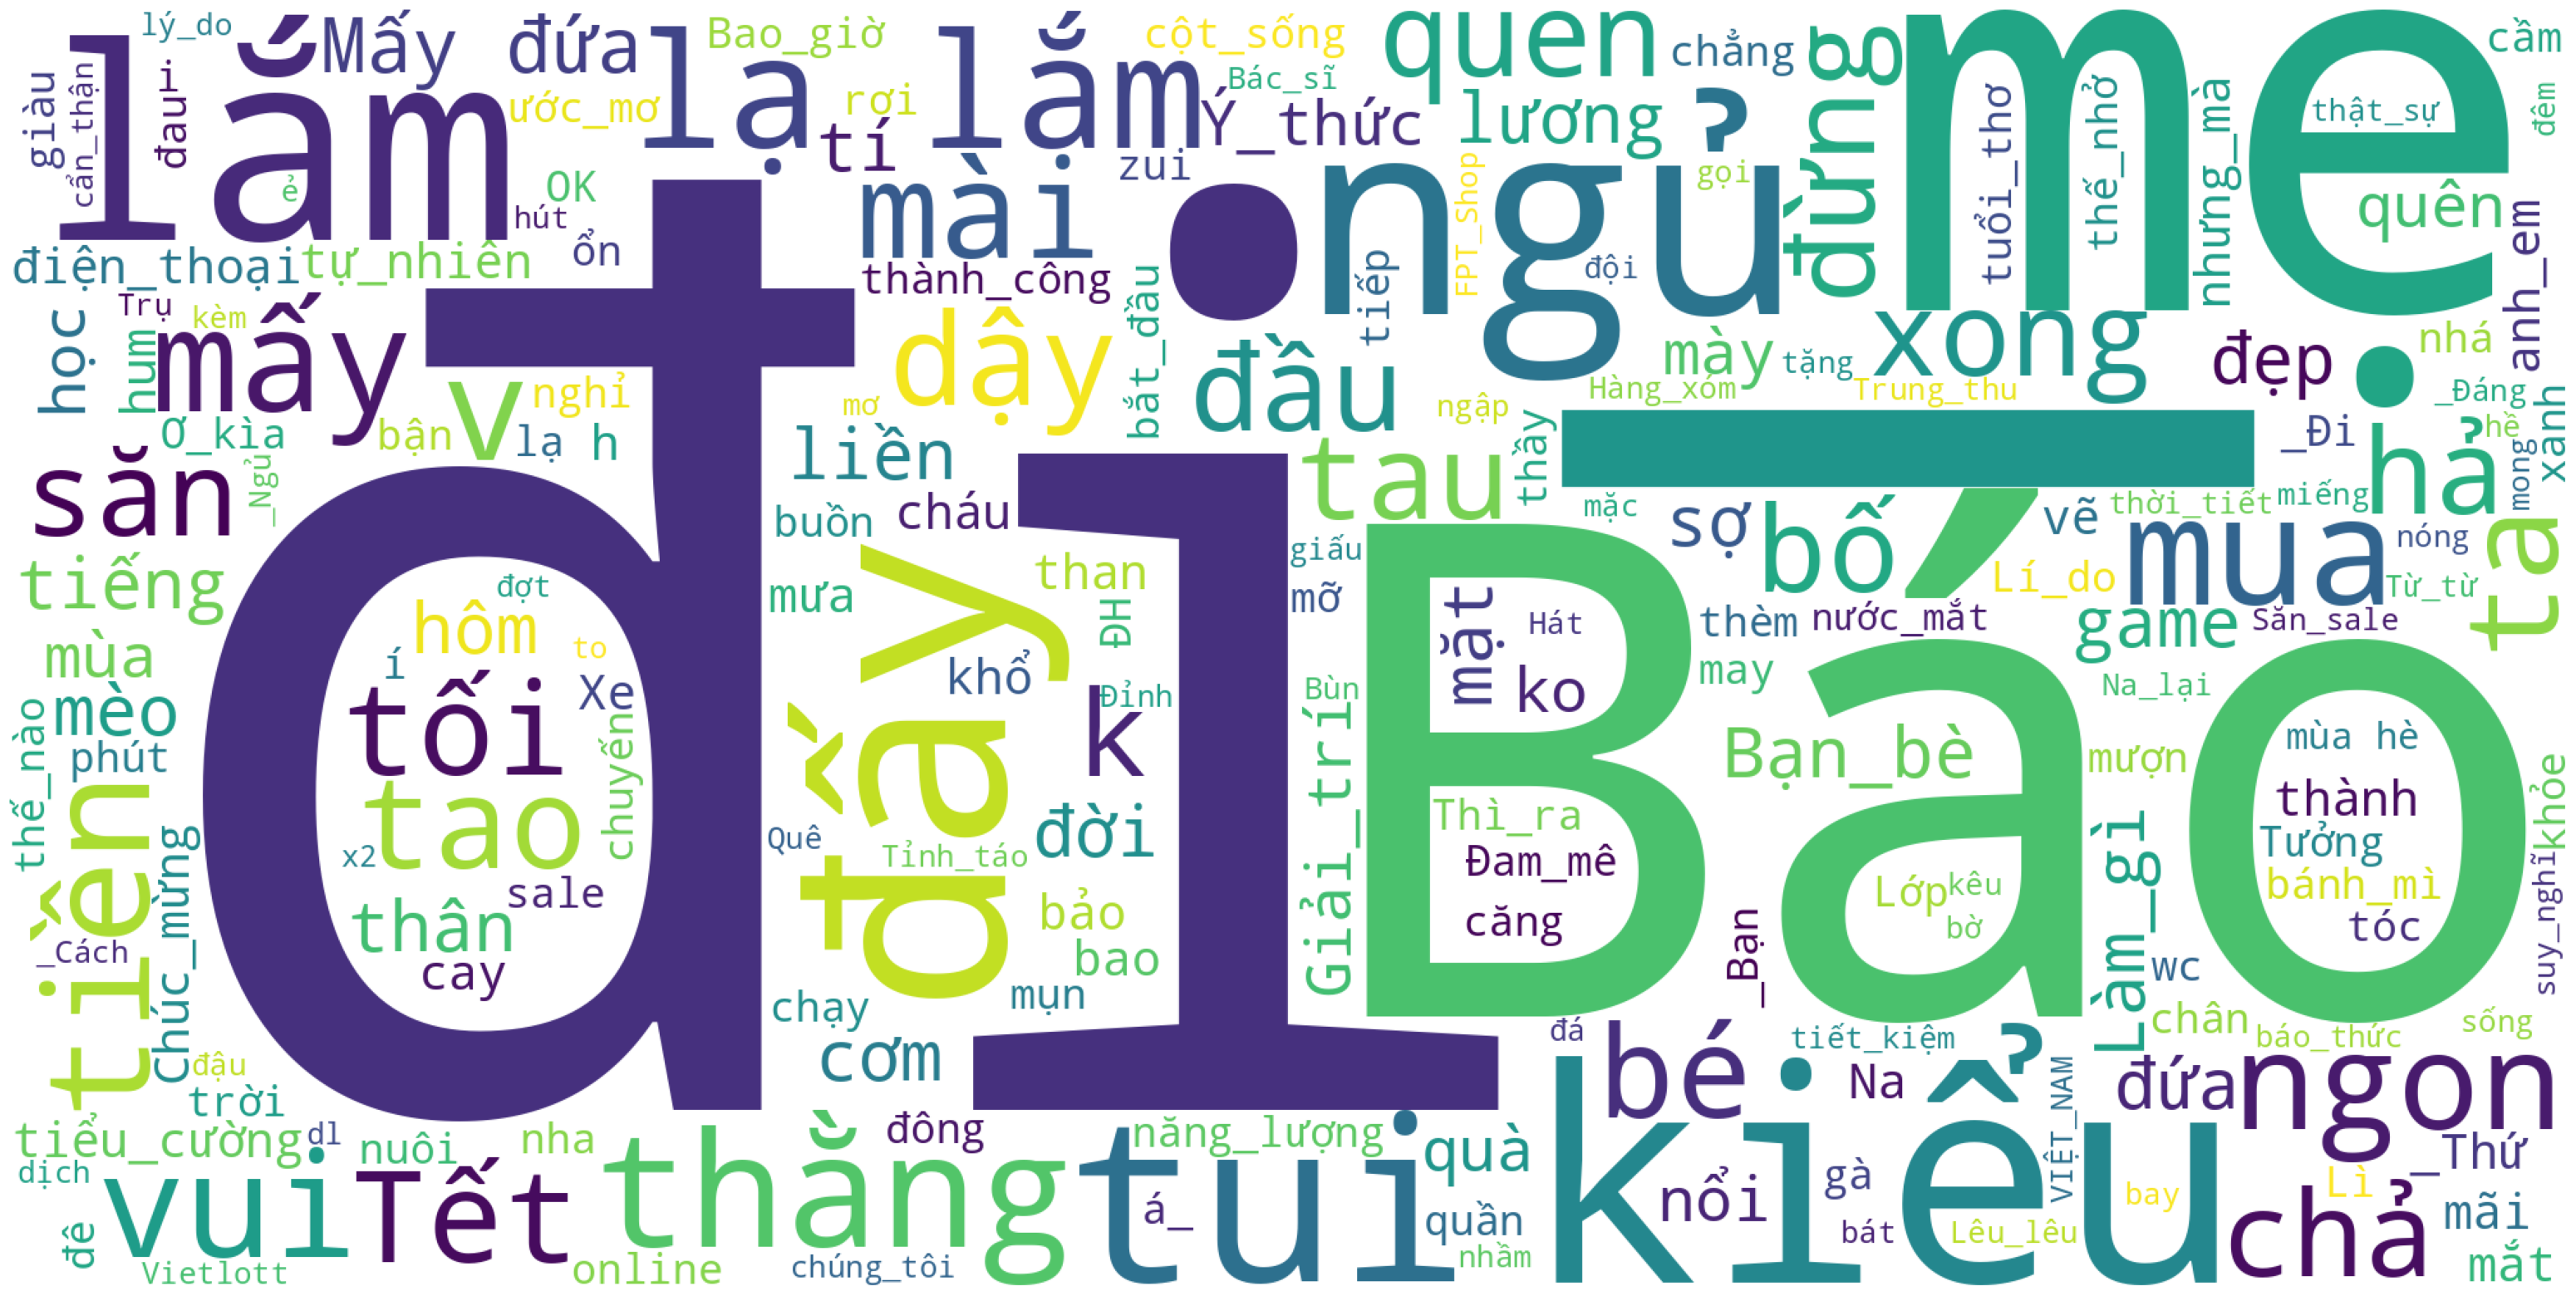

In [21]:
from wordcloud import WordCloud
from underthesea import word_tokenize, classify

# Danh sách các stopwords Tiếng Việt
stopwords = set(open('data/other/vietnamese-stopwords.txt', mode='r', encoding='utf-8').read().splitlines())

# Tokenize text
post_text = ' '.join(df['post_text'])
post_text = word_tokenize(post_text, format='text')

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color='white', 
    width=2000, 
    height=1000).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết?